# Check out how the channel might meander from the old radarlines to new

Interpolation of old and new radarline comes from 26_RADAR_interpolate_line2line_by_distance_downchan


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import time
import datetime as dt
import pandas as pd
import geopandas as gpd
import scipy as sp
from scipy import signal
from tqdm.notebook import tqdm
import rasterio as rio
from shapely.geometry import Point, LineString, Polygon, MultiPoint
import fiona
from shapely.ops import nearest_points

In [27]:
new_gpr = gpd.read_file('/Volumes/arc_04/FIELD_DATA/K8621920/RES/PROCESSED_LINES/picked_bed.shp')
old_gpr = gpd.read_file('/Volumes/arc_04/FIELD_DATA/K8621920/RES/PROCESSED_LINES/1516_gprlines.shp')
old_gpr['camp'] = 'KIS2' 
bed_gdf = pd.concat([new_gpr,old_gpr])
gdf = bed_gdf[bed_gdf.camp =='KIS2'].copy()
ngpr = new_gpr[new_gpr.camp =='KIS2'].copy()

KeyboardInterrupt: 

In [ ]:
x_old = np.load('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/channel_line2line_interpbydistold_points_x.npy')
y_old = np.load('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/channel_line2line_interpbydistold_points_y.npy')
it_old = np.load('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/channel_line2line_interpbydistold_ice_thickn.npy')

In [ ]:
x_new = np.load('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/channel_line2line_interpbydist_points_x.npy')
y_new = np.load('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/channel_line2line_interpbydist_points_y.npy')
it_new = np.load('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/channel_line2line_interpbydist_ice_thickn.npy')

# plot channel over REMA surface

In [ ]:
#load REMA
nid1 = 159202
nid2 = 131226
df = gpd.read_file('/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/REMA_Strip_Index_Rel1.shp')
path = f"/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/DIFFERENCES/REMA_{nid1}-{nid2}_diff.tif"
f = df.loc[nid1].acquisitio
t =df.loc[nid2].acquisitio
duration = (pd.to_datetime(t)-pd.to_datetime(f)).days/365.25
with rio.open(path) as image:
    im = image.read(1)
    im[im==-9999] = np.nan
    im = im / duration
with rio.open('/Volumes/arc_02/whitefar/DATA/REMOTE_SENSING/REMA_STRIPES/SETSM_WV01_20161109_1020010058134D00_10200100576C9100_seg1_2m_v1.0_dem.tif') as image:
    extent_REMA = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
    im_REMA = image.read(1)/100

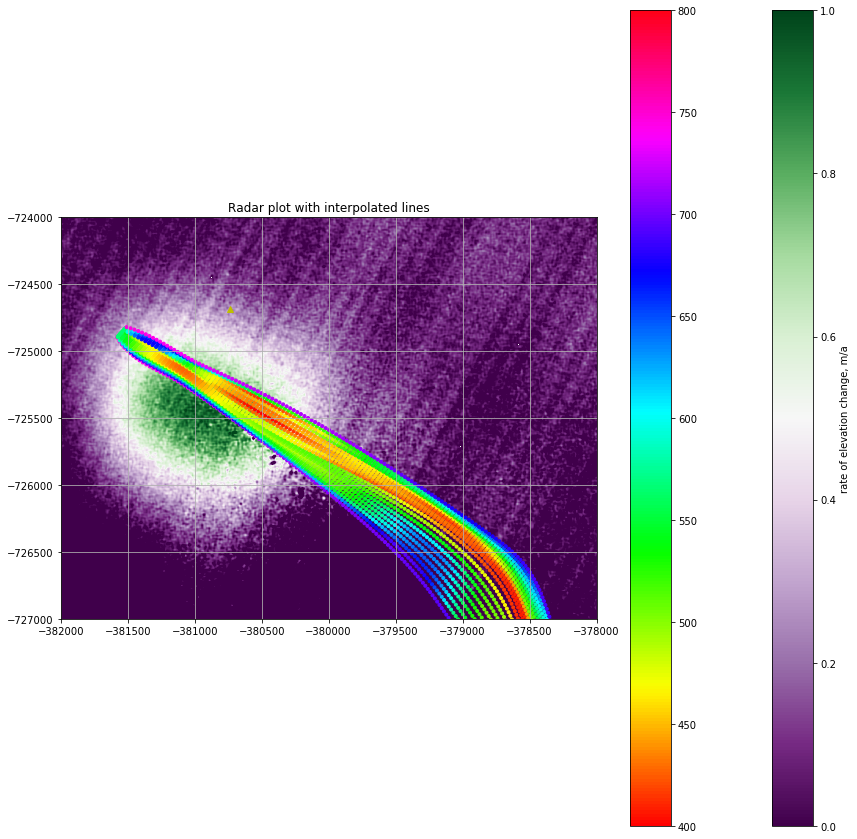

In [6]:
#rema
v=[0,1]    

extent_REMA1 = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
kis2 = [-380737.537026,-724683.311299]
plt.figure(figsize=(15,15))
# GyRd = plt.cm.get_cmap('PuOr').reversed()
plt.imshow(im,extent=extent_REMA1, vmin=v[0],vmax=v[1],cmap='PRGn')
cb = plt.colorbar()
plt.plot(kis2[0],kis2[1],'y^')
cb.set_label('rate of elevation change, m/a')

# radar
plt.scatter( x_new,y_new,c=it_new,cmap='hsv',vmin=400, vmax=800,marker='.')
# plt.scatter( gdf.x,gdf.y,c=gdf.ice_thickn,cmap='hsv',vmin=400, vmax=800)

plt.colorbar()
plt.title('Radar plot with interpolated lines')
plt.xlim([-382000, -378000])
plt.ylim([-727000,-724000])
plt.grid()
plt.show()

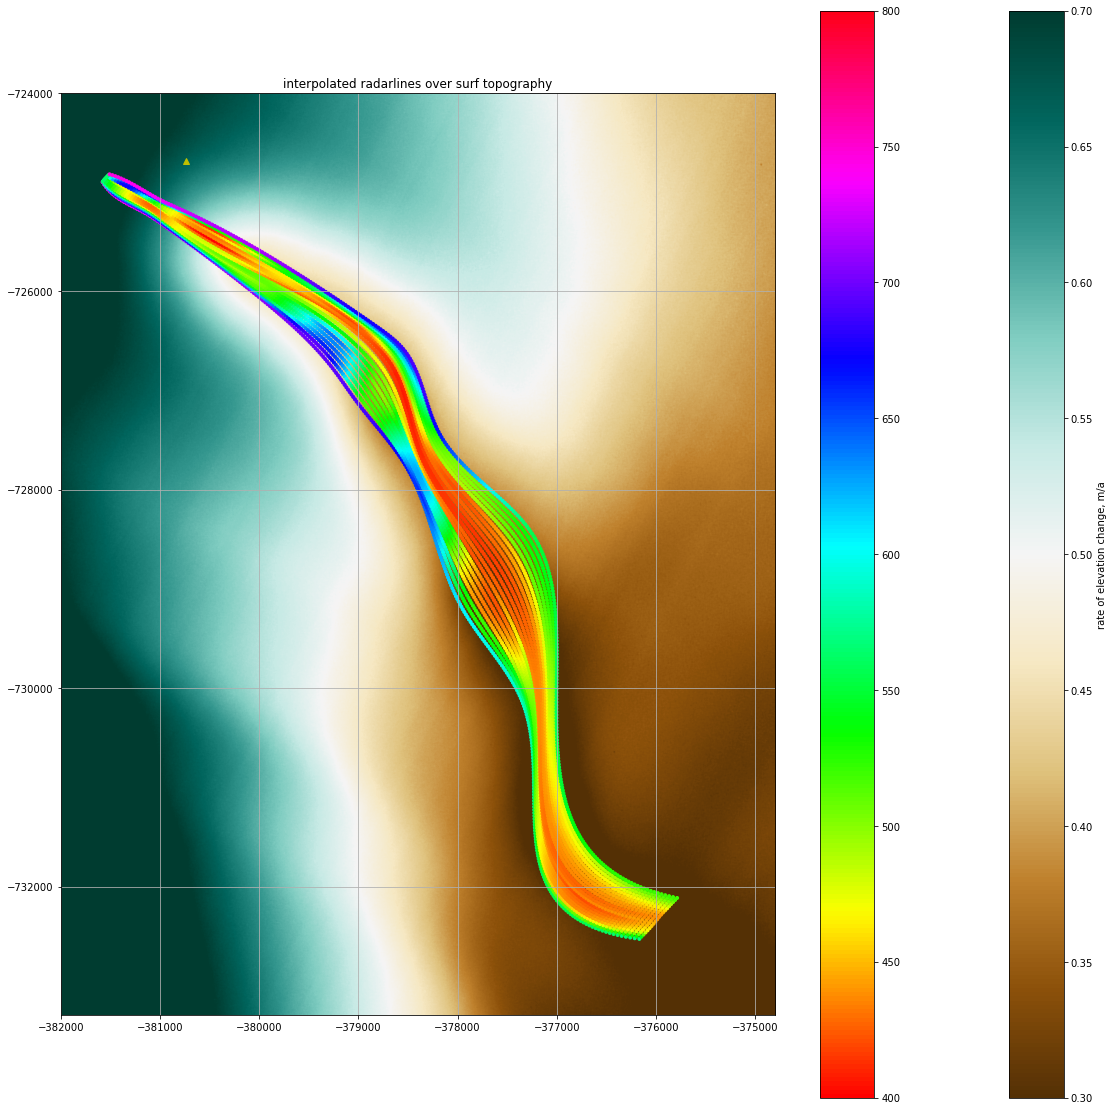

In [7]:
#rema
v=[0,1]    

kis2 = [-380737.537026,-724683.311299]
plt.figure(figsize=(20,20))
plt.imshow(im_REMA,extent=extent_REMA,vmin=0.3,vmax=0.7, cmap='BrBG')
cb = plt.colorbar()
cb.set_label('surface elevation (?)')
plt.plot(kis2[0],kis2[1],'y^')
cb.set_label('rate of elevation change, m/a')

# radar
plt.scatter( x_new,y_new,c=it_new,cmap='hsv',vmin=400, vmax=800,marker='.')

plt.colorbar()
plt.title('interpolated radarlines over surf topography')
plt.xlim([-382000, -374800])
plt.ylim([-733300,-724000])
plt.grid()
plt.show()

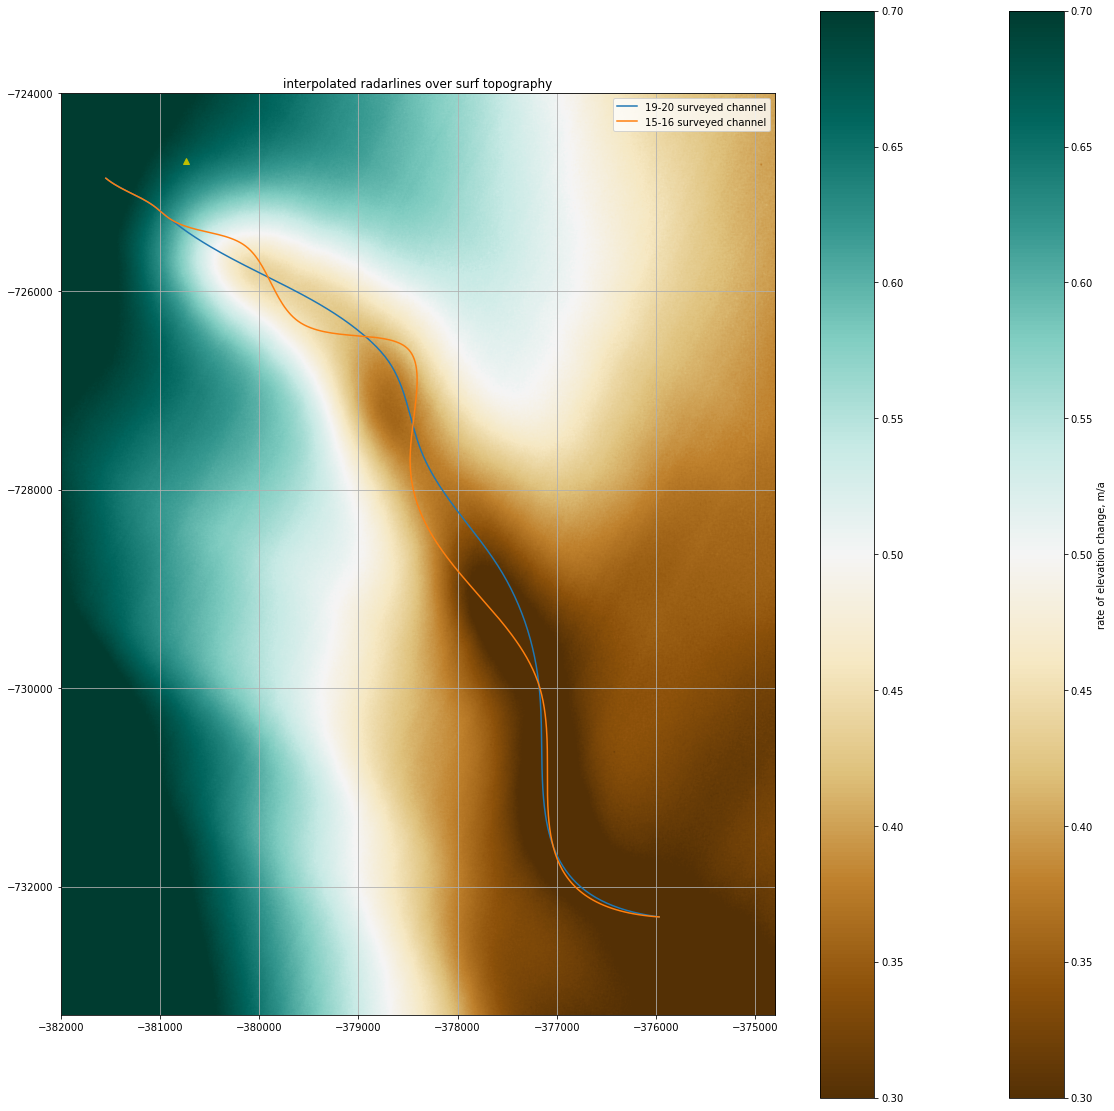

In [8]:
#rema
v=[0,1]    

plt.figure(figsize=(20,20))
extent = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
kis2 = [-380737.537026,-724683.311299]

plt.imshow(im_REMA,extent=extent_REMA,vmin=0.3,vmax=0.7, cmap='BrBG')
cb = plt.colorbar()
cb.set_label('surface elevation (?)')
plt.plot(kis2[0],kis2[1],'y^')
cb.set_label('rate of elevation change, m/a')

i=10
plt.plot(x_new[i,:],y_new[i,:],label="19-20 surveyed channel")
plt.plot(x_old[i,:],y_old[i,:],label="15-16 surveyed channel")

plt.colorbar()
plt.legend()
plt.title('interpolated radarlines over surf topography')
plt.xlim([-382000, -374800])
plt.ylim([-733300,-724000])
plt.grid()
plt.show()

# Plot underside of ice

In [9]:
direc = '/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/interpolatedgrid_allchan'

xv = np.load(direc + 'x_grid' +'.npy')
yv = np.load(direc + 'y_grid' +'.npy')
thickness_interpolated = np.load(direc +'ice_thickness'+'.npy')
extent_l2l = np.load(direc +'extent.npy')
surf_out = np.load(direc +'surface.npy')

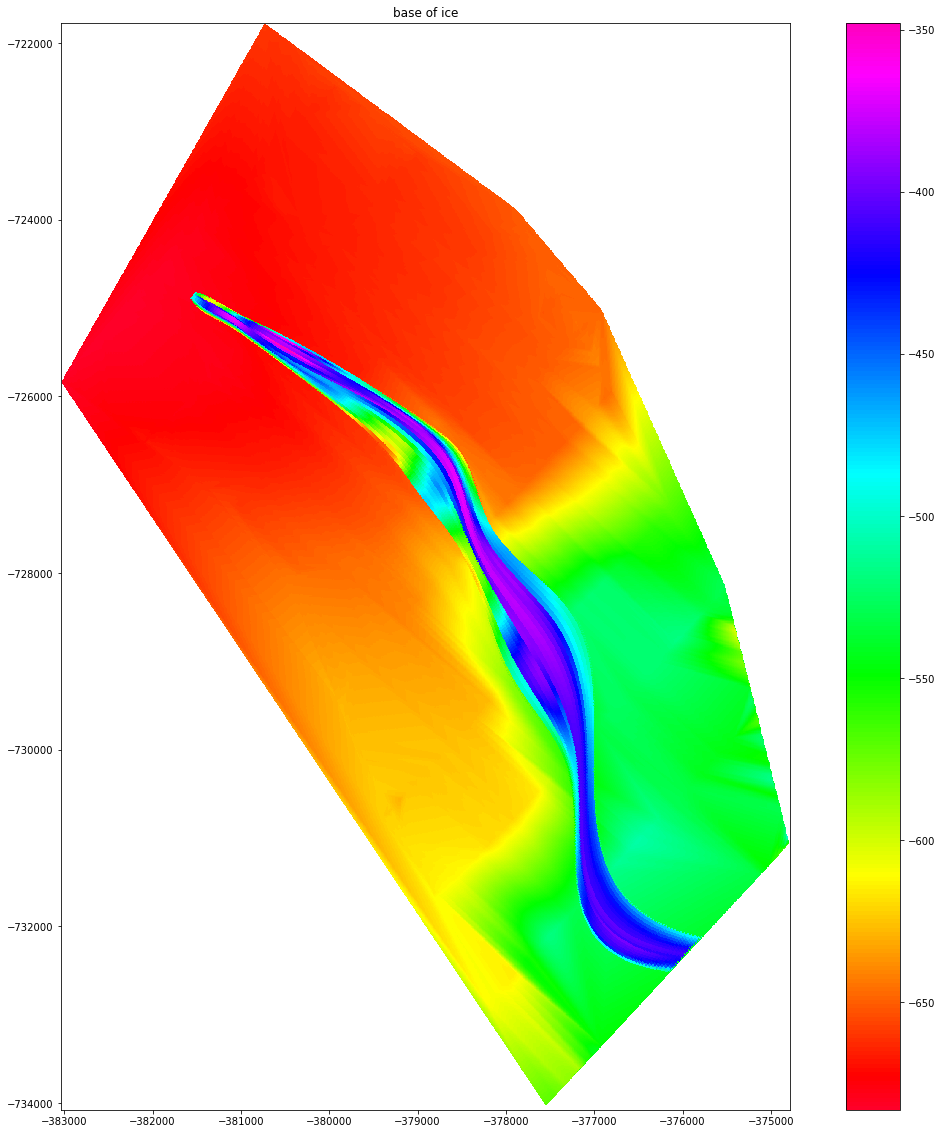

In [10]:
plt.figure(figsize=(20,20))

v = [-750,-350]
plt.imshow(surf_out-thickness_interpolated,extent=extent_l2l,cmap='gist_rainbow')
plt.colorbar()
plt.title('base of ice')


plt.show()

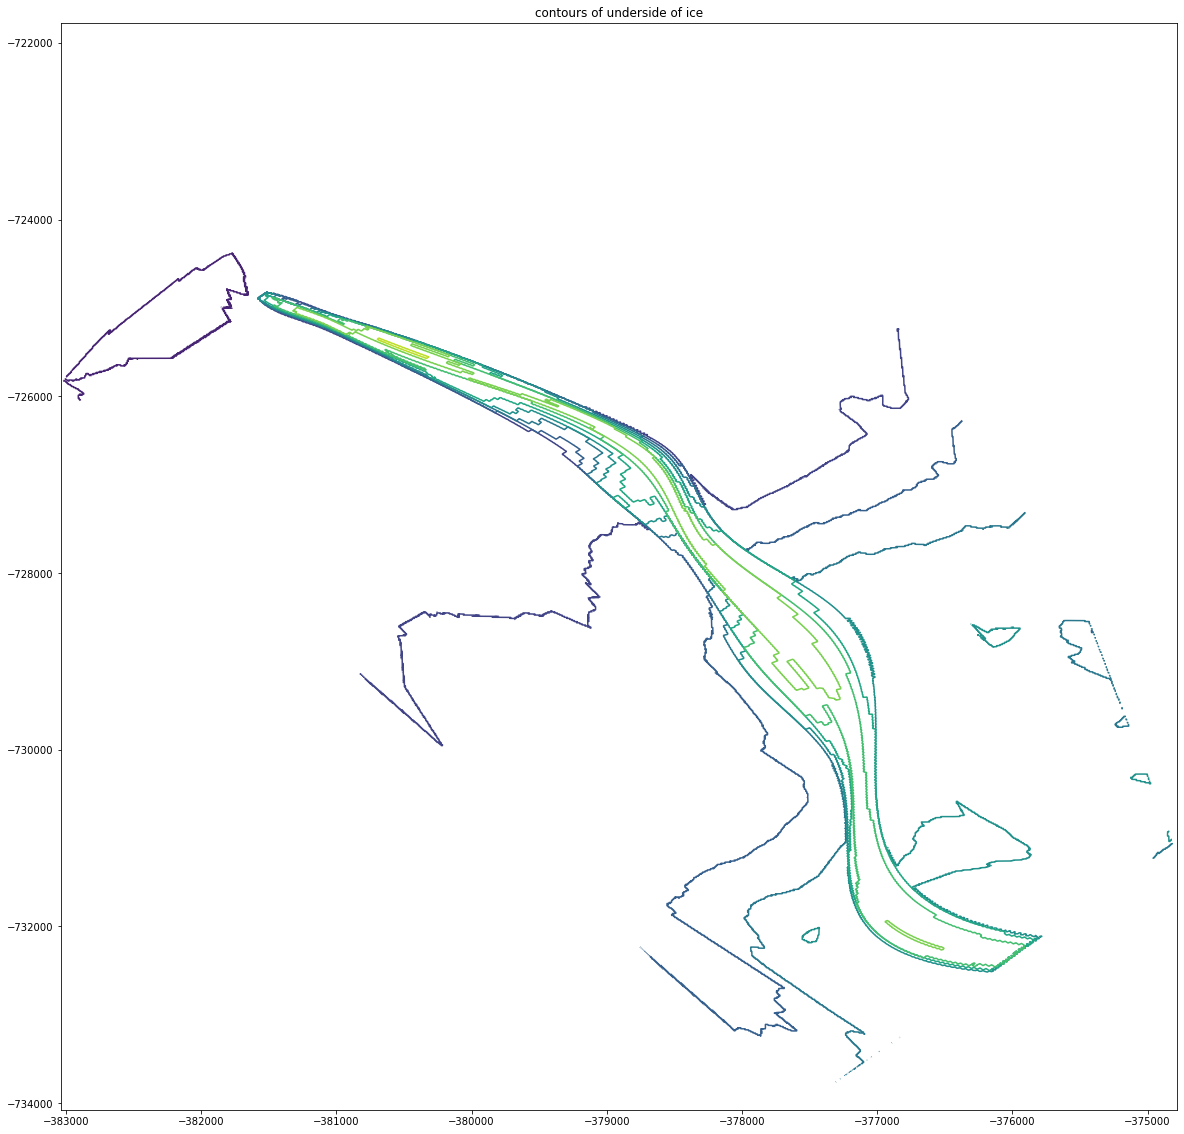

In [11]:
plt.figure(figsize=(20,20))
plt.contour(xv,yv,surf_out-thickness_interpolated,10)
plt.title('contours of underside of ice')
plt.show()

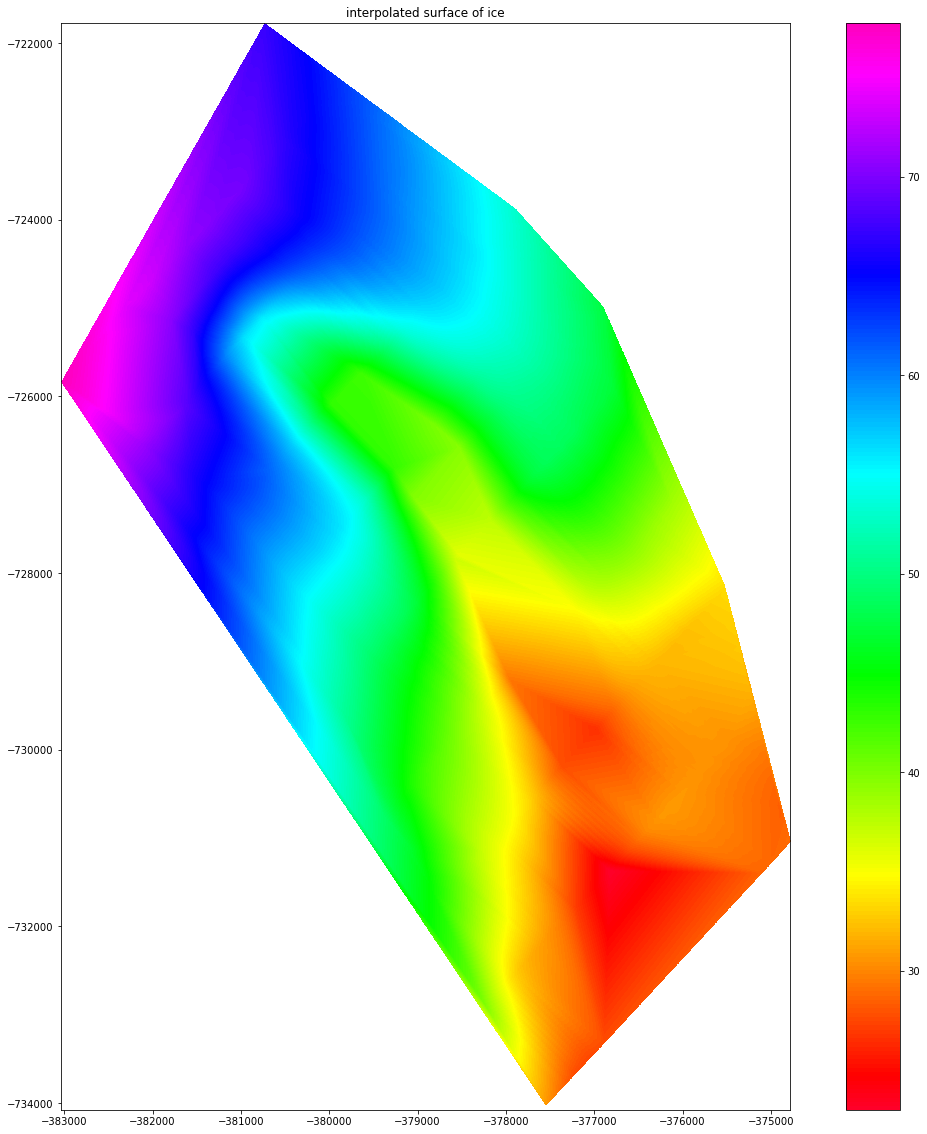

In [12]:
plt.figure(figsize=(20,20))

v = [-750,-350]
plt.imshow(surf_out,extent=extent_l2l,cmap='gist_rainbow')
plt.colorbar()
plt.title('interpolated surface of ice')


plt.show()

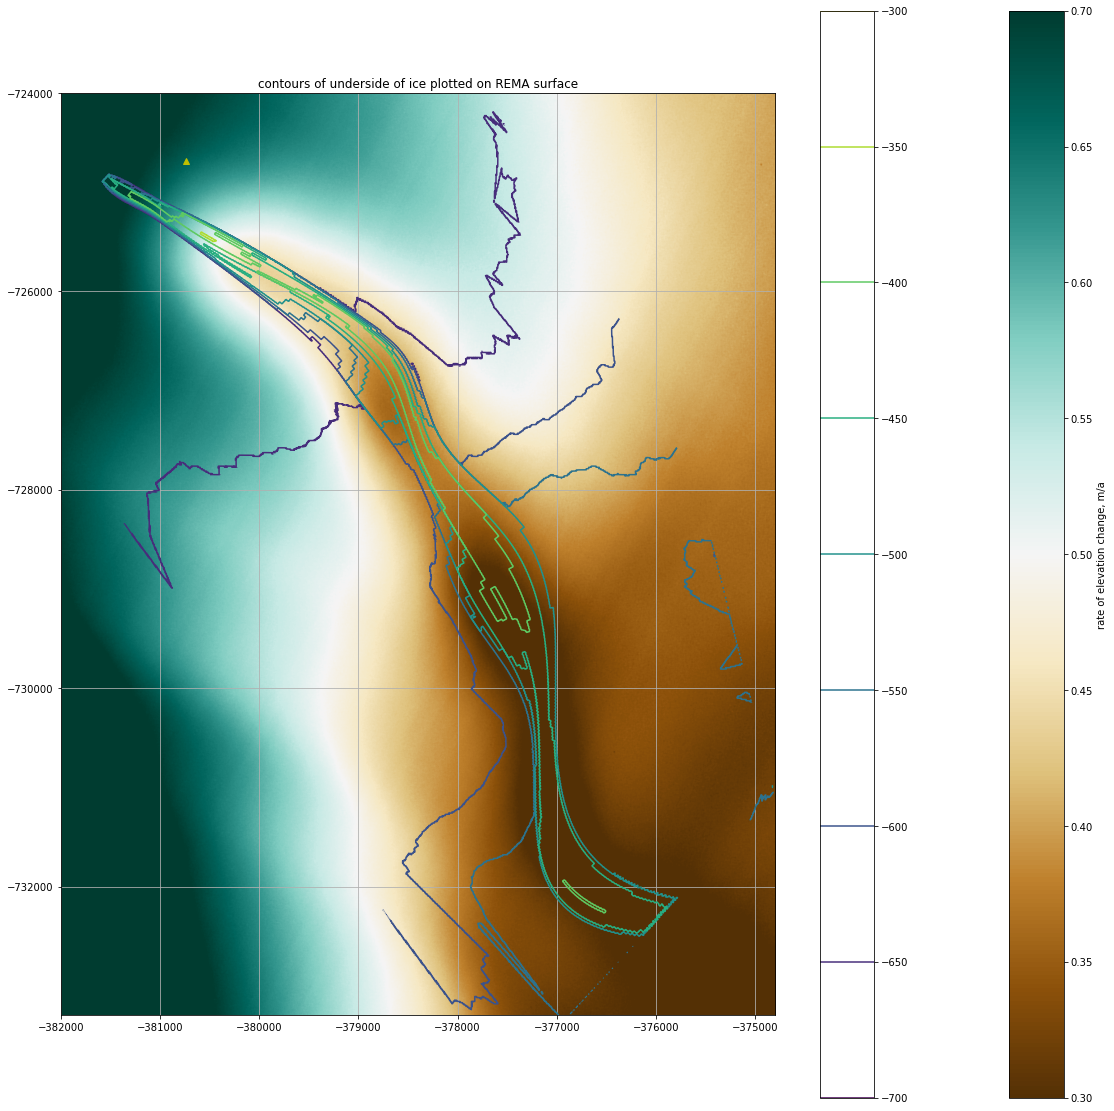

In [13]:
#rema
v=[0,1]    

extent = [image.bounds[0],image.bounds[2],image.bounds[1],image.bounds[3]]
kis2 = [-380737.537026,-724683.311299]
plt.figure(figsize=(20,20))
plt.imshow(im_REMA,extent=extent_REMA,vmin=0.3,vmax=0.7, cmap='BrBG')
cb = plt.colorbar()
cb.set_label('surface elevation (?)')
plt.plot(kis2[0],kis2[1],'y^')
cb.set_label('rate of elevation change, m/a')

plt.contour(xv,yv,surf_out-thickness_interpolated)
plt.title('contours of underside of ice plotted on REMA surface')

plt.colorbar()
# plt.title('interpolated radarlines over surf topography')
plt.xlim([-382000, -374800])
plt.ylim([-733300,-724000])
plt.grid()
plt.show()

In [14]:
extent_REMA

[-406498.0, -365488.0, -739742.0, -699564.0]

In [15]:
x = np.linspace(extent_REMA[0],extent_REMA[1],im_REMA.shape[1]).astype('int')
y = np.linspace(extent_REMA[3],extent_REMA[2],im_REMA.shape[0]).astype('int')

In [16]:
xmin, xmax, ymin, ymax = extent_l2l

In [17]:
x_i = np.argwhere((x>xmin) & (x< xmax)).flatten()[0]
x_j = np.argwhere((x>xmin) & (x< xmax)).flatten()[-1]
y_i = np.argwhere((y>ymin) & (y< ymax)).flatten()[0]
y_j = np.argwhere((y>ymin) & (y< ymax)).flatten()[-1]

In [18]:
x_c = np.linspace(extent_REMA[0],extent_REMA[1],im_REMA.shape[1]).astype('int')[x_i:x_j]
y_c = np.linspace(extent_REMA[3],extent_REMA[2],im_REMA.shape[0]).astype('int')[y_i:y_j]

In [19]:
xv_REMA, yv_REMA = np.meshgrid(x_c, y_c)

In [20]:
im_REMA_c = im_REMA[y_i:y_j,x_i:x_j]
im_REMA_c[im_REMA_c==-99.99] = np.nan

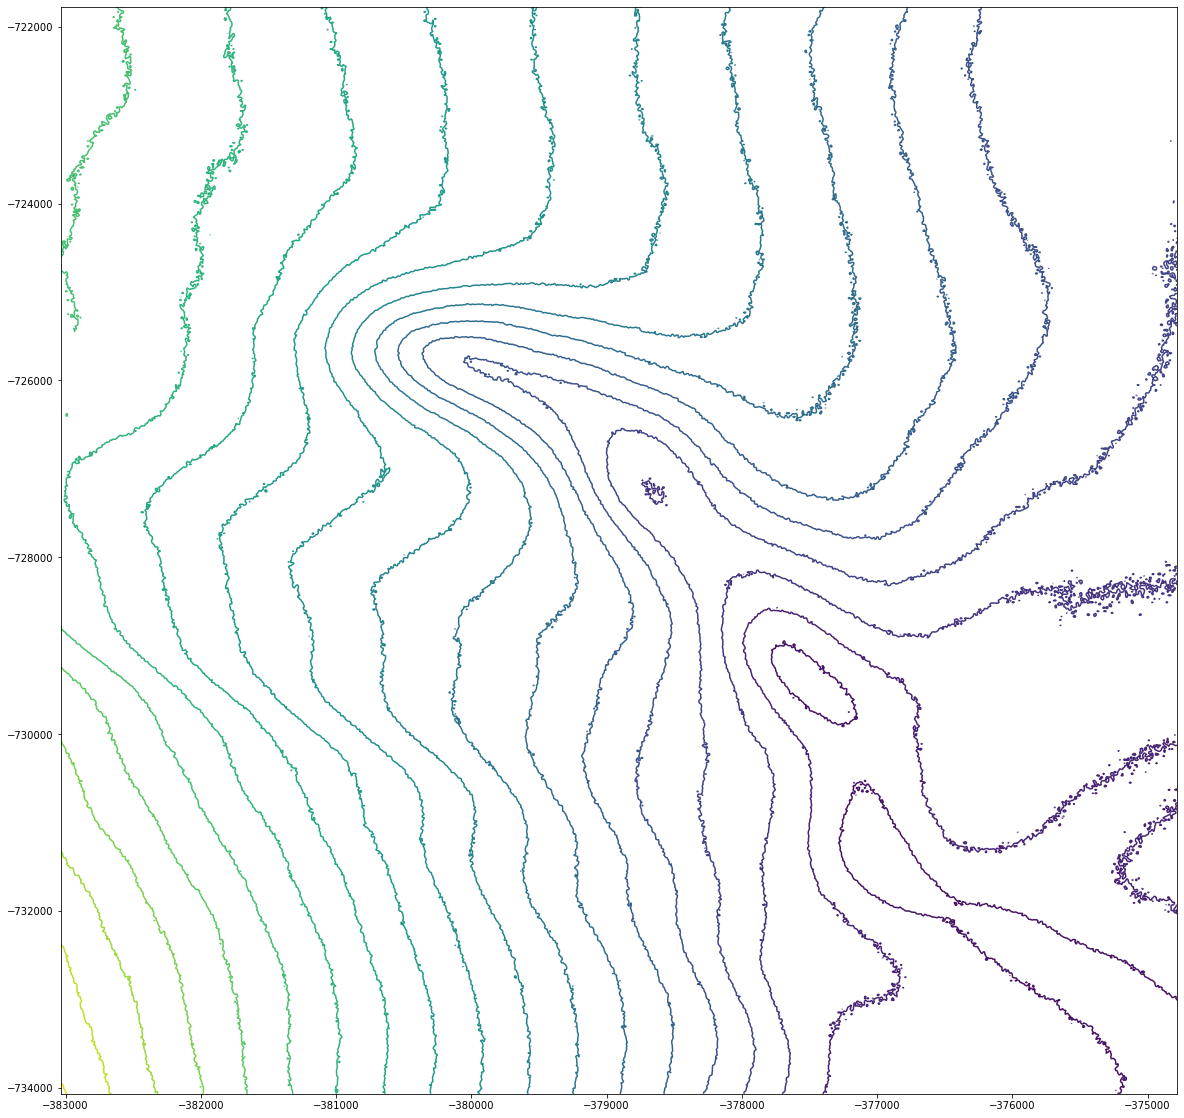

In [21]:
jj = 10

plt.figure(figsize=(20,20))
plt.contour(xv_REMA[::jj],yv_REMA[::jj],im_REMA_c[::jj],20)


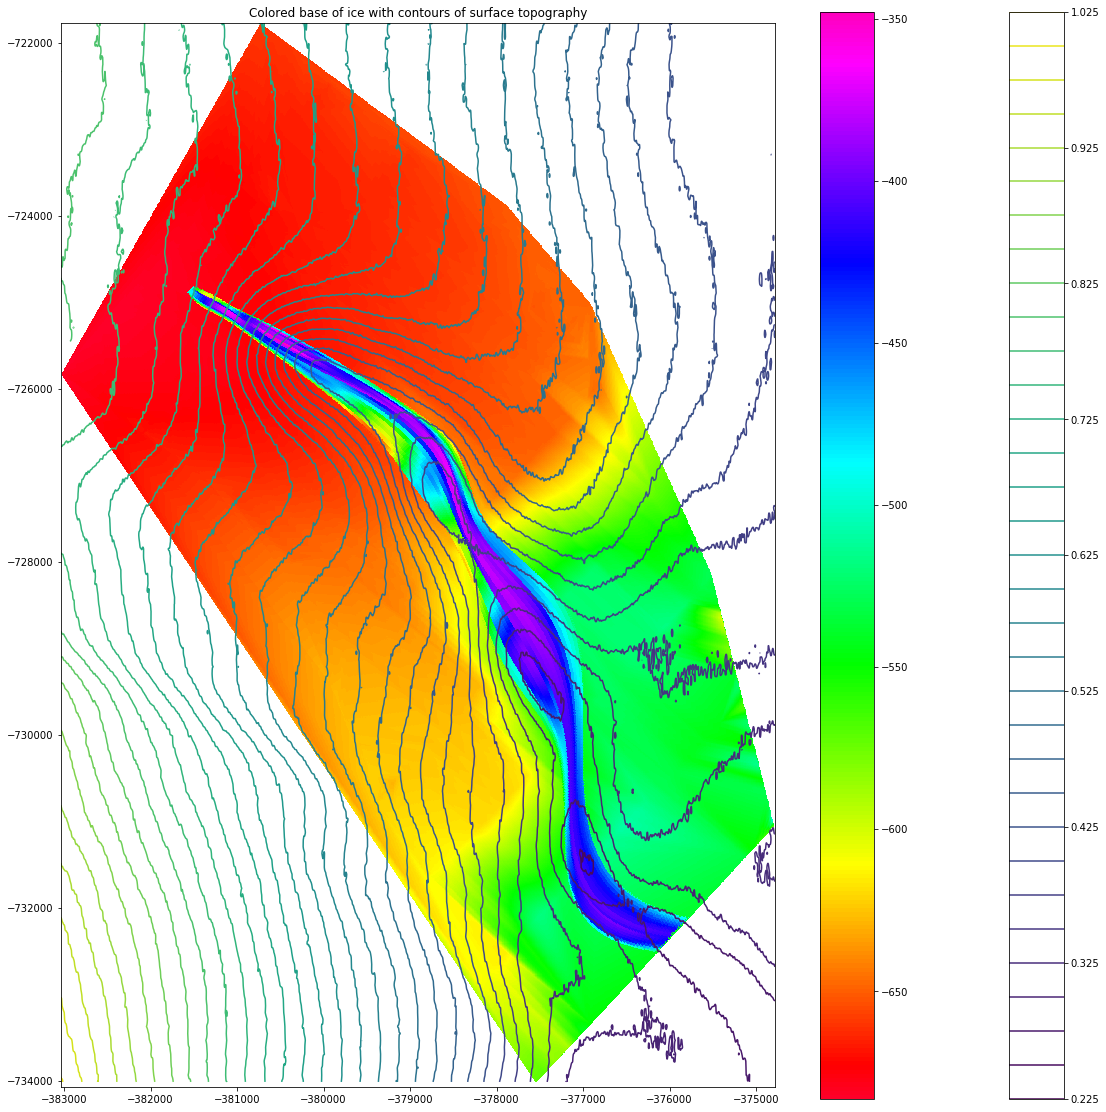

In [22]:
jj = 40

plt.figure(figsize=(20,20))
plt.contour(xv_REMA[::jj],yv_REMA[::jj],im_REMA_c[::jj],30)
plt.colorbar()
v = [-750,-350]
plt.imshow(surf_out-thickness_interpolated,extent=extent_l2l,cmap='gist_rainbow')
plt.colorbar()
plt.title('Colored base of ice with contours of surface topography')
plt.show()

# Conclustion

Episodic discrete melt events. Each blob has a corner, and a dip

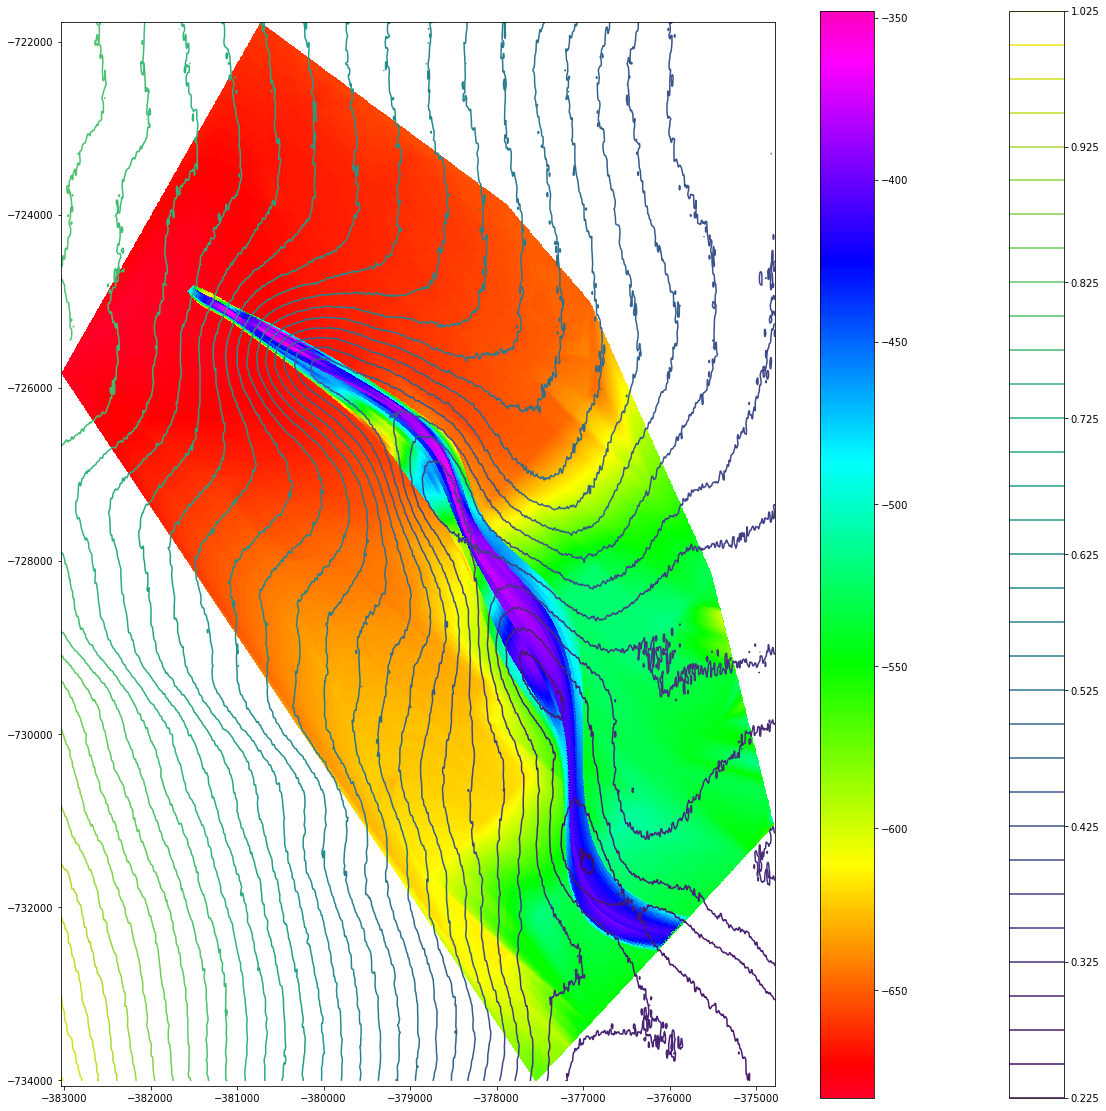

In [23]:
jj = 40

plt.figure(figsize=(20,20))
plt.contour(xv_REMA[::jj],yv_REMA[::jj],im_REMA_c[::jj],30)
plt.colorbar()
v = [-750,-350]
plt.imshow(surf_out-thickness_interpolated,extent=extent_l2l,cmap='gist_rainbow')
plt.colorbar()
# plt.title('Colored base of ice with contours of surface topography')
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.show()

In [24]:
ll = {} #a dictionary of geodataframes of radarlines over KIS2, ie one gdf for each line.

for line in bed_gdf[bed_gdf.camp =='KIS2'].line_name.unique().tolist():
    ll[line] = bed_gdf[(bed_gdf.line_name==line) & (bed_gdf.camp=='KIS2')].copy()
    ll[line].sort_values(by='x',inplace=True)
    ll[line].reset_index(drop=True,inplace=True)

cross_channel_lines = [ 'line7p75','line7p5','line7p25','line7', 'line6','line5','lineAPREScross','line4','line3','line2','line1','line0']

#lines which cross the channel, (ll restricted to the above subset)
cl  = {key:ll[key] for key in cross_channel_lines}

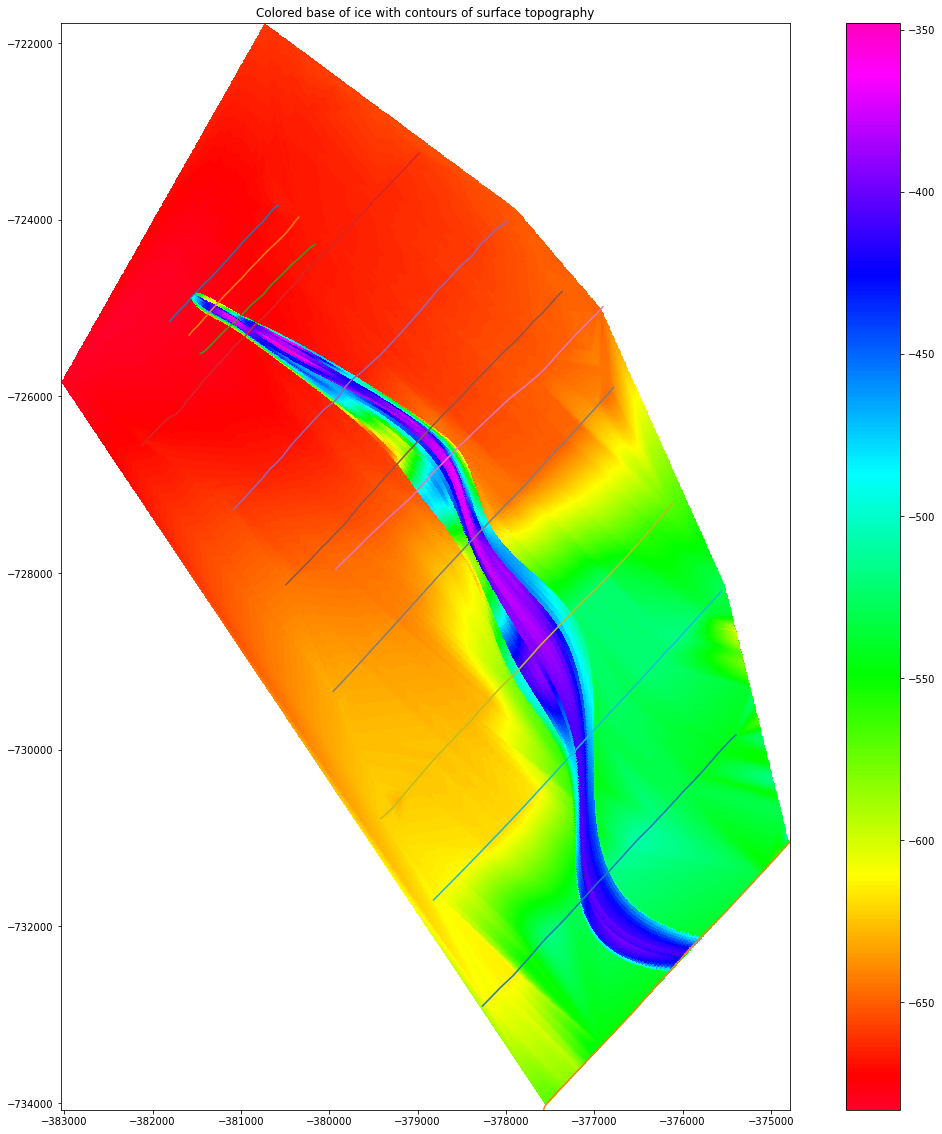

In [25]:
jj = 40

plt.figure(figsize=(20,20))
v = [-750,-350]
plt.imshow(surf_out-thickness_interpolated,extent=extent_l2l,cmap='gist_rainbow')
plt.colorbar()
plt.title('Colored base of ice with contours of surface topography')
for line in cl.values():
    plt.plot(line.x,line.y)
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
plt.show()

# Four blobs hypothesis.

### Evidence

1. surface REMA, shows blobs
2. Spline down channel shows four corresponding lows
3. channel goes wide and narrow, this is evident for blob 2 and 3, loose for 4 and doesnt show for 1